In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score, recall_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [82]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#df = pd.read_csv('asthma_dataset_0 (1).csv')
df = pd.read_csv('asthma_dataset_0 (2).csv')

#df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)


print(df.shape)
print("Number of non-null rows in EventDay: ", df.EventDay.count())
display(df.head())

(2575, 187)
Number of non-null rows in EventDay:  200


,SubjectNr,DayNo,weekday,dayType,stepsTotalDaily,stepsTotalDetailed,steps00,steps01,steps02,steps03,steps04,steps05,steps06,steps07,steps08,steps09,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,HR05Perc,HR95Perc,HrAvgWake,HR00,HR01,HR02,HR03,HR04,HR05,HR06,HR07,HR08,HR09,HR10,HR11,HR12,HR13,HR14,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,awakeDuration,lightSleepDuration,deepSleepDuration,wakeUpCount,HRAvgSleep,HRMinSleep,HRMaxSleep,activity_score_parent,school_yes_no,activity_score_child,screentime,sleep_score_child,bedtimeReport,waketimeReport,fvc_best,fev1_best,pef_best,grade_fev1,grade_fvc,Technique,fev1_ratio_best,fev1_percentage,fvc1_percentage,fev1_ratio_percentage,ACD1,ACD2,ACD3,ACD4,ACD5,ACD6,ACD6_use,ACD6score,BASELINE_ACQ6_score,EOS_ACQ6_score,BASELINE_physical_tot,EOS_physical_tot,BASELINE_emotional_tot,EOS_emotional_tot,BASELINE_school_tot,EOS_school_tot,BASELINE_bodyimage_tot,EOS_bodyimage_tot,BASELINE_treatmentburden_tot,EOS_treatmentburden_tot,BASELINE_health_tot,EOS_health_tot,BASELINE_weight_tot,EOS_weight_tot,BASELINE_respiratory_tot,EOS_respiratory_tot,BASELINE_digestion_tot,EOS_digestion_tot,BASELINE_PAQLQ_total,EOS_PAQLQ_total,BASELINE_PAQLQ_activity,EOS_PAQLQ_activity,BASELINE_PAQLQ_symptoms,EOS_PAQLQ_symptoms,BASELINE_PAQLQ_emotion,EOS_PAQLQ_emotion,BASELINE_PedsQL_score,EOS_PedsQL_score,FG,FHX,FHN,TG,TN,TX,SQ,SP,DR,RH,RHX,pollenTotal,NO,NO2,Nox,O3,Ox,PM10,PM25,Symptomscore,Admission_LY,Age,AgeDiagnosis,AllergicRhin,AtopicAsthma,BirthMonth,BirthYear,BMI,BMI_SDS,CF_Asthma,DailyActiv,DayCare,Dis_Chronic,Eosinophils,ExerciseSymp,Family_his,Gender,Height,Hosp_treatme,Hospital_Trt,ICS,LABA,Leukotri_Mod,Monoclonals,Oral_Steroid,OtherClass,PancrInsuffi,PetsHome,Pseudomonas,SABA,SchoolYear,Serum_IgE,SmokeHome,Sports,Vaccination,Weight,school_year_edit,Urbanisation,urbanisation2,totalSleepDuration,steps15_19,week,steps_hour_max,AVGHR_daily,AVGHR_wake,AVGHR_sleep,CONDITION,EventDay
0,1771258,0,Tue,school,3723.0,3723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322.4,461.2,63.0,137.0,274.2,341.2,605.0,1640.0,376.4,82.0,451.0,245.0,135.0,160.0,164.0,41.0,0.0,68.0,120.0,8.689362e+09,78.42,73.22,70.71,67.9,68.74,68.54,69.37,87.78,99.44,101.38,99.36,120.0,103.26,103.88,93.28,101.70,88.76,89.8,83.4,87.8,91.5,93.30,77.1,78.6,660.0,16800.0,16440.0,1.0,75.0,61.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3232.0,2381.0,4334.00,D,B,3.0,0.736696,0.726555,0.877857,0.822316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166667,2.666667e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.652174e+09,5.304348e+09,6.4,5.6,6.5,4.2,7.0,6.5,847826087.0,8.586957e+09,6.3,8,4,14.0,85,19.7,5.4,58,0.0,0,0,6.0,32.31,48.88,98.41,3.86,27.83,23.42,13.04,NaN,1,15,7.0,No,Yes,12,2002.0,19.5,-0.1,Controlled asthma,School,0.0,0.0,NaN,No,No,Female,163.2,0.0,0.0,Yes,Yes,No,No,No,No,NaN,Yes,NaN,Yes,4.0,1465.0,No,Yes,0.0,51.9,Secondary school year 4,1.0,Extremely urbanised,33240.0,NaN,1.0,1640.0,90.0,94.0,NaN,Controlled asthma,NaN
1,1771258,1,Wed,school,10015.0,10015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,339.2,607.0,580.0,325.0,180.0,322.0,181.0,491.0,161.0,10.0,744.0,1146.0,4355.0,722.0,142.0,49.0,0.0,82.0,168.0,1.326242e+09,73.60,75.20,70.75,92.0,76.00,70.30,82.30,78.00,99.00,113.00,129.80,95.1,91.60,97.02,108.50,85.25,93.40,95.8,101.8,142.3,107.8,104.20,91.8,93.0,180.0,22200.0,11760.0,0.0,84.0,67.0,121.0,8.0,Ja,8.0,B. 30 tot 60 minuten,9.0,15:34:00,13:04:00,3261.0,2257.0,4509.00,A,A,3.0,0.692119,0.688716,0.885734,0.772559,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.500000,0.166667,2.666667e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.652174e+09,5.304348e+09,6.4,5.6,6.5,4.2,7.0,6.5,847826087.0,8.586957e+09,10.0,12,8,11.3,100,13.1,0.2,2,0.9,2,1,3.0,3.47,32.18,37.49,25.72,29.69,10.83,3.09,NaN,1,15,7.0,No,Yes,12,2002.0,19.5,-0.1,Controlled asthma,School,0.0,0.0,NaN,No,No,Female,163.2,0.0,0.0,Yes,Yes,No,No,No,No,NaN,Yes,NaN,Yes,4.0,1465.0,No,Yes,0.0,51.9,Secondary school year 4,1.0,Extrem

##### When wanting to merge healthy and asthma

In [778]:
# import pandas as pd
# df_healthy = pd.read_csv('healthy_dataset_0 (1).csv')

# # Assuming you have two DataFrames: df1 and df2
# df1=df
# df2=df_healthy

# # Get the column names of each DataFrame
# columns_df1 = set(df1.columns)
# columns_df2 = set(df2.columns)

# # Find the common columns
# common_columns = columns_df1.intersection(columns_df2)
# print(common_columns)

# # Count the number of common columns
# num_common_columns = len(common_columns)

# # Print the result
# print("Number of common columns:", num_common_columns)

# merged_df = pd.merge(df1, df2, on=list(common_columns), how='outer')

# # Print the merged DataFrame
# merged_df

##### Drop columns that have NaN except for EventDay column

In [51]:
columns_to_drop = df.columns[df.isna().any() & ~df.columns.isin(['EventDay'])]
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.shape

(2575, 81)

##### One-Hot Encoding

In [52]:
one_hot_asthma = pd.get_dummies(df_cleaned[df_cleaned.columns[df_cleaned.dtypes == object].tolist()])
asthma_df = pd.concat([df_cleaned, one_hot_asthma], axis=1)
asthma_df = asthma_df.drop(columns=df_cleaned.columns[df_cleaned.dtypes == object].tolist())
print(asthma_df.shape)

(2575, 110)


##### Feature Selection using Variance Treshold

In [53]:
from sklearn.feature_selection import VarianceThreshold

columns_to_drop = ['EventDay', 'SubjectNr', 'DayNo']
selected_features = asthma_df.columns.drop(columns_to_drop)

# Perform variance threshold feature selection
threshold = 0.2
selector = VarianceThreshold(threshold)
selector.fit(asthma_df[selected_features])
selected_features = selected_features[selector.get_support()]

df_selected = asthma_df[selected_features]
df_selected = pd.concat([asthma_df[columns_to_drop], df_selected], axis=1)
print(df_selected.shape)

df_selected.head()

(2575, 81)


,EventDay,SubjectNr,DayNo,stepsTotalDaily,steps00,steps01,steps02,steps03,steps04,steps05,steps06,steps07,steps08,steps09,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,HR00,HR01,HR02,HR03,HR04,HR05,HR06,HR07,HR08,HR09,HR10,HR11,HR12,HR13,HR14,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,FG,FHX,FHN,TG,TN,TX,SQ,SP,DR,RH,RHX,O3,PM10,PM25,Age,BirthMonth,BirthYear,BMI,BMI_SDS,Height,Weight,dayType_school,CF_Asthma_Controlled asthma,CF_Asthma_Cystic Fibrosis,CF_Asthma_Uncontrolled asthma,DailyActiv_School,CONDITION_Controlled asthma,CONDITION_Cystic Fibrosis,CONDITION_Uncontrolled asthma
0,NaN,1771258,0,3723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322.4,461.2,63.0,137.0,274.2,341.2,605.0,1640.0,376.4,82.0,451.0,245.0,135.0,160.0,164.0,41.0,0.0,78.42,73.22,70.71,67.9,68.74,68.54,69.37,87.78,99.44,101.38,99.36,120.0,103.26,103.88,93.28,101.70,88.76,89.8,83.4,87.8,91.5,93.30,77.1,78.6,6.3,8,4,14.0,85,19.7,5.4,58,0.0,0,0,3.86,23.42,13.04,15,12,2002.0,19.5,-0.1,163.2,51.9,1,1,0,0,1,1,0,0
1,NaN,1771258,1,10015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,339.2,607.0,580.0,325.0,180.0,322.0,181.0,491.0,161.0,10.0,744.0,1146.0,4355.0,722.0,142.0,49.0,0.0,73.60,75.20,70.75,92.0,76.00,70.30,82.30,78.00,99.00,113.00,129.80,95.1,91.60,97.02,108.50,85.25,93.40,95.8,101.8,142.3,107.8,104.20,91.8,93.0,10.0,12,8,11.3,100,13.1,0.2,2,0.9,2,1,25.72,10.83,3.09,15,12,2002.0,19.5,-0.1,163.2,51.9,1,1,0,0,1,1,0,0
2,NaN,1771258,2,3811.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,561.0,159.0,356.0,26.0,591.0,109.0,114.0,456.0,155.0,727.0,46.0,139.0,210.0,6.0,93.0,0.0,79.10,73.10,80.30,78.0,76.10,74.60,78.10,98.50,103.40,100.50,109.60,100.6,105.00,109.00,86.50,88.60,102.80,78.2,85.2,94.0,100.0,89.25,96.5,82.0,6.0,9,4,9.9,62,13.3,8.2,89,0.0,0,0,26.94,16.22,4.94,15,12,2002.0,19.5,-0.1,163.2,51.9,1,1,0,0,1,1,0,0
3,NaN,1771258,3,4346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352.4,515.0,673.0,377.0,490.0,192.0,322.0,180.0,523.0,61.0,359.0,174.0,95.0,148.0,196.0,21.0,20.0,77.10,79.80,72.60,67.0,80.20,76.00,73.60,79.00,98.50,103.50,106.40,95.5,106.20,98.20,100.00,84.30,86.80,97.2,74.0,107.0,82.4,96.10,90.8,78.2,6.9,10,4,9.5,63,11.7,3.2,35,0.0,0,0,6.62,20.86,12.79,15,12,2002.0,19.5,-0.1,163.2,51.9,1,1,0,0,1,1,0,0
4,NaN,1771258,4,3270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292.2,559.4,50.0,92.0,167.0,1324.0,388.0,166.0,101.0,91.0,6.0,224.0,405.0,56.0,65.0,63.0,72.0,83.30,77.60,75.10,76.2,72.60,75.80,73.80,68.00,74.80,65.40,94.40,85.7,77.25,86.50,78.00,76.60,90.00,89.1,92.2,110.6,77.4,81.10,76.5,82.0,9.3,12,6,11.2,98,12.9,0.5,5,5.5,38,10,29.31,10.35,3.31,15,12,2002.0,19.5,-0.1,163.2,51.9,0,1,0,0,1,1,0,0


##### Feature Selection using PCA (weird)

In [12]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=len(training.columns))
# pca.fit(data_train)

# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# num_components = np.argmax(cumulative_variance >= 0.8) + 1

# print("Number of components for 80% variance explained:", num_components)

# pca = PCA(n_components=num_components) 
# data_train_pca = pca.fit_transform(data_train)
# data_pred_pca = pca.transform(data_pred)

# data_train = pd.DataFrame(data_train_pca, columns=[f"PC{i}" for i in range(1, num_components+1)])
# data_pred = pd.DataFrame(data_pred_pca, columns=[f"PC{i}" for i in range(1, num_components+1)])

##### Df without eventDay column

In [54]:
df_withoutEventDay = df_selected[df_selected['EventDay'].isnull()]

##### Remove useless columns & Scale

In [140]:
training = df_withoutEventDay.drop(['EventDay', 'SubjectNr', 'DayNo'], axis = 1)   # without eventDay rows
predicting = df_selected.drop(['EventDay', 'SubjectNr', 'DayNo'], axis = 1)         # with eventDay rows

# Scale training
data_train = training
scaler_train = StandardScaler()
np_scaled_train = scaler_train.fit_transform(data_train)
data_train = pd.DataFrame(np_scaled_train, columns=training.columns)

# Scale predicting
data_pred = predicting
scaler_pred = StandardScaler()
np_scaled_pred = scaler_pred.fit_transform(data_pred)
data_pred = pd.DataFrame(np_scaled_pred, columns=predicting.columns)

print("Length Training: ", len(training), ",    Length Predicting", len(predicting))

Length Training:  2375 ,    Length Predicting 2575


# k-Means Cluster

##### Elbow method to see how many clusters are needed

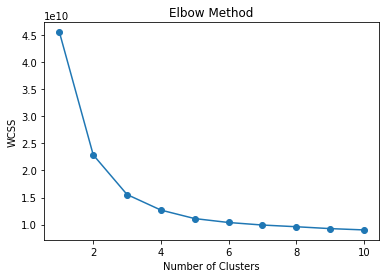

In [58]:
# Initialize lists to store the number of clusters and corresponding WCSS values
num_clusters = []
wcss_values = []

# Set the range of the number of clusters to try
min_clusters = 1
max_clusters = 10

# Perform clustering for different numbers of clusters
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(predicting)
    
    # Compute the within-cluster sum of squares (WCSS)
    wcss = kmeans.inertia_
    
    # Append the number of clusters and WCSS values to the lists
    num_clusters.append(k)
    wcss_values.append(wcss)

# Plot the number of clusters against the WCSS values
plt.plot(num_clusters, wcss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [141]:
# cluster_df = training

# # Select relevant columns for clustering
# columns_to_cluster = cluster_df.columns

# # Extract the subset of data for clustering
# data_for_clustering = cluster_df[columns_to_cluster]

# # Standardize the data
# scaler = StandardScaler()
# data_for_clustering_standardized = scaler.fit_transform(data_for_clustering)

# # Choose the number of clusters
# num_clusters = 4  # Choose an appropriate number of clusters

# # Apply k-means clustering
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(data_for_clustering_standardized)

# # Get the cluster labels
# cluster_labels = kmeans.labels_

# # Assign cluster labels to the original dataframe
# cluster_df['ClusterLabel'] = cluster_labels

# # Check the distribution of clusters
# cluster_counts = cluster_df['ClusterLabel'].value_counts()
# print(cluster_counts)

# # You can further analyze and interpret the clusters, e.g., by calculating cluster means
# cluster_means = cluster_df.groupby('ClusterLabel').mean()

# # These mean values provide insights into the characteristics of each cluster. For example, cluster 0 has higher stepsTotalDaily and heart rate values compared to other clusters, indicating potentially higher activity levels. Cluster 1 has relatively lower stepsTotalDaily and heart rate values but higher FG values, suggesting a different pattern of physical activity. Clusters 2, 3, and 4 also show distinct patterns in terms of steps, heart rate, and other features.
# cluster_means

In [142]:
# # To get the columns with maximum values in each row/cluster

# # Calculate the mean values of each feature within each cluster
# cluster_means = cluster_df.groupby('ClusterLabel').mean()

# # Get the top 5 features within each cluster
# top_features_per_cluster = {}
# for cluster_label, cluster_mean in cluster_means.iterrows():
#     top_features = cluster_mean.nlargest(5).index.tolist()
#     top_features_per_cluster[cluster_label] = top_features

# # Print the top 5 features within each cluster
# for cluster_label, top_features in top_features_per_cluster.items():
#     print(f"Cluster {cluster_label}: {top_features}")

    
    
# grouped_by_max = cluster_means.idxmax(axis=0)
# grouped_by_max[grouped_by_max == 4]

The clustering is performed on training, and the cluster labels are assigned to it. The cluster means are calculated based on the training data.

Then, for the predicting DataFrame (where all rows are present), the data is standardized using the same scaler as the training data. The cluster labels are predicted for the prediction data using the trained clustering model.

The anomalies are detected by comparing the features of each row in the predicting DataFrame with the corresponding cluster mean from the training data. If any feature deviates from the cluster mean by some threshold value, the row is considered an anomaly.

In [143]:
# Select relevant columns for clustering
columns_to_cluster = data_train.columns

# Extract the subset of data for clustering from training DataFrame
data_for_clustering = data_train[columns_to_cluster]

# Standardize the data
scaler = StandardScaler()
data_for_clustering_standardized = scaler.fit_transform(data_for_clustering)

# Choose the number of clusters
num_clusters = 4  # Choose an appropriate number of clusters

# Apply k-means clustering on training data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_for_clustering_standardized)

# Get the cluster labels for training data
training_cluster_labels = kmeans.labels_

# Assign cluster labels to the training DataFrame
data_train['ClusterLabel'] = training_cluster_labels

# Check the distribution of clusters in training data
training_cluster_counts = data_train['ClusterLabel'].value_counts()
print(training_cluster_counts)

# Calculate cluster means on training data
training_cluster_means = data_train.groupby('ClusterLabel').mean()



# Extract the subset of data for anomaly prediction from predicting DataFrame
data_for_prediction = data_pred[columns_to_cluster]

# Standardize the data for prediction using the same scaler as training
data_for_prediction_standardized = scaler.transform(data_for_prediction)

# Get the cluster labels for prediction data
prediction_cluster_labels = kmeans.predict(data_for_prediction_standardized)

# Assign cluster labels to the predicting DataFrame
data_pred['ClusterLabel'] = prediction_cluster_labels

# Check the distribution of clusters in predicting data
prediction_cluster_counts = data_pred['ClusterLabel'].value_counts()
print(prediction_cluster_counts)

threshold = 10

# Detect anomalies based on cluster means
anomaly_rows = []
for index, row in data_pred.iterrows():
    cluster_label = row['ClusterLabel']
    features = row[columns_to_cluster]
    cluster_mean = training_cluster_means.loc[cluster_label]
    if any(abs(features - cluster_mean) > threshold):
        anomaly_rows.append(index)

# Print the detected anomalies
anomalies = data_pred.loc[anomaly_rows]

1    740
2    583
3    575
0    477
Name: ClusterLabel, dtype: int64
1    765
3    647
2    641
0    522
Name: ClusterLabel, dtype: int64


In [145]:
# Add back the other columns
corresponding_info = asthma_df.loc[anomalies.index, ['EventDay', 'SubjectNr', 'DayNo']]
anomalies_with_info = pd.concat([anomalies, corresponding_info], axis=1)
anomalies_with_info.head()

,stepsTotalDaily,steps00,steps01,steps02,steps03,steps04,steps05,steps06,steps07,steps08,steps09,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,HR00,HR01,HR02,HR03,HR04,HR05,HR06,HR07,HR08,HR09,HR10,HR11,HR12,HR13,HR14,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,FG,FHX,FHN,TG,TN,TX,SQ,SP,DR,RH,RHX,O3,PM10,PM25,Age,BirthMonth,BirthYear,BMI,BMI_SDS,Height,Weight,dayType_school,CF_Asthma_Controlled asthma,CF_Asthma_Cystic Fibrosis,CF_Asthma_Uncontrolled asthma,DailyActiv_School,CONDITION_Controlled asthma,CONDITION_Cystic Fibrosis,CONDITION_Uncontrolled asthma,ClusterLabel,EventDay,SubjectNr,DayNo
84,2.274527,-0.149470,-0.106997,-0.078803,-0.052564,-0.06176,-0.091897,-0.275045,-0.752167,1.292270,-0.710402,0.208155,-0.392769,0.462317,-0.078737,1.030273,3.875609,2.860828,-0.698609,-0.698656,0.725097,2.751668,6.337069,4.100740,11.735445,0.160431,0.238642,0.643527,0.227782,0.200940,0.148878,0.560440,0.017996,-0.335169,-0.016493,0.308305,0.106559,0.008355,0.321499,-0.557039,2.074537,0.346450,-1.334819,0.239148,-0.205649,0.237076,0.708759,1.672263,2.771306,-0.783288,-0.922069,-0.501856,-1.010641,-1.114968,-0.798644,-0.790263,-0.780466,-0.685215,-0.541734,-0.420179,-1.913494,1.290485,1.505749,-0.099967,-0.071870,-0.05083,1.696879,1.883048,-0.113631,0.695410,0.742432,1.410925,-0.701964,-0.710611,-0.805967,1.375957,-0.701964,-0.692737,1,NaN,8380204,0
85,0.695624,12.637321,-0.106997,-0.078803,-0.052564,-0.06176,-0.091897,-0.275045,-0.557662,-1.109591,-0.493546,-0.625089,-0.710988,-0.645182,-0.432890,4.272691,1.463405,0.799103,-0.791404,-0.625647,-0.248736,0.027582,0.223975,-0.174620,-0.237307,-0.075422,-0.978464,0.735642,0.742081,0.280457,1.214980,1.118287,-0.559266,-1.214783,-0.757495,-0.389089,-0.173611,-0.747092,-0.427229,0.353229,-1.029711,-0.026416,-0.267480,-0.313668,-0.342222,-0.505137,-0.060072,-0.686330,-0.666119,-0.918247,-1.203888,-0.501856,-1.346064,-1.114968,-1.437516,-1.039366,-1.162914,-0.685215,-0.541734,-0.420179,-1.676963,1.224434,1.641064,-0.099967,-0.071870,-0.05083,1.696879,1.883048,-0.113631,0.695410,-1.346925,1.410925,-0.701964,-0.710611,-0.805967,1.375957,-0.701964,-0.692737,1,NaN,8380204,1
100,0.321267,7.002675,15.782435,2.862987,-0.052564,-0.06176,-0.091897,-0.275045,-0.825106,-1.019697,-0.318799,2.669826,-0.503134,-0.102013,-0.443462,-0.487739,-0.317493,-0.623538,0.764692,0.192053,-0.472873,-0.408046,0.114168,-0.379673,-0.237307,2.329169,1.994467,1.974080,0.700771,-0.043890,0.134471,0.012047,-0.051340,-0.424118,0.045257,0.364451,0.550162,-0.298312,-1.276303,-0.503040,-0.323175,-1.044028,0.787820,-0.352875,-1.266102,0.385519,-1.711038,-0.211335,-0.578318,2.185816,1.614304,2.841207,0.043544,0.072766,-0.275931,-0.491339,-0.270536,0.878614,0.639366,0.143049,1.170001,0.311074,-0.629216,-0.099967,-0.071870,-0.05083,1.696879,1.883048,-0.113631,0.695410,-1.346925,1.410925,-0.701964,-0.710611,-0.805967,1.375957,-0.701964,-0.692737,1,NaN,8380204,16
124,1.955661,-0.149470,-0.106997,-0.078803,-0.052564,-0.06176,-0.091897,-0.275045,-0.712892,-0.249527,10.130252,2.207120,-0.381732,-0.241333,0.989006,-0.073282,0.076468,-0.524956,0.946713,1.087629,-0.704738,0.270854,-0.435606,-0.133609,-0.237307,-0.342599,-0.000789,-0.031985,0.669790,0.678044,0.278539,0.068777,-0.083589,-0.424118,4.406363,1.339620,0.620205,0.778761,1.363544,0.692650,-0.105201,0.859140,1.329514,1.725086,1.585875,-0.010328,1.890333,0.755033,0.554320,2.185816,1.614304,2.841207,0.043544,0.072766,-0.275931,-0.491339,-0.270536,0.878614,0.639366,0.143049,1.170001,0.311074,-0.629216,-0.479637,1.303059,-0.05083,-0.639802,-0.578370,-0.198466,-0.498294,-1.346925,1.410925,-0.701964,-0.710611,1.240745,1.375957,-0.701964,-0.692737,1,NaN,1725729,11
139,0.532131,-0.149470,-0.106997,-0.078803,-0.052564,-0.06176,-0.091897,-0.275045,-0.825106,-1.065858,-0.638818,-0.960924,-0.438754,10.417463,-0.920951,-0.853925,-0.892289,-0.718720,-0.432717,-0.739216,-0.639043,-0.246807,-0.417181,1.158226,-0.237307,-0.674266,-0.4896

In [146]:
print("Total amount of anomalies detected:            ", len(anomalies_with_info))
print("Amount of non-null rows in EventDay:           ", anomalies_with_info['EventDay'].count())

# Count the non-null values in the 'EventDay' column
non_null_count = anomalies_with_info['EventDay'].count()

# Calculate the total number of rows
total_rows = len(anomalies_with_info)

# Calculate the percentage
percentage = (non_null_count / total_rows) * 100

# Print the percentage
print("Percentage of non-null rows in EventDay:       ", percentage)

Total amount of anomalies detected:             43
Amount of non-null rows in EventDay:            2
Percentage of non-null rows in EventDay:        4.651162790697675


# Isolation Forest

In [117]:
# Train
outliers_fraction = 0.3
ifo = IsolationForest(contamination = outliers_fraction)
ifo.fit(data_train)

# Predict
df['anomaly1'] = pd.Series(ifo.predict(data_pred))

In [118]:
df.anomaly1.value_counts()

 1    1723
-1     852
Name: anomaly1, dtype: int64

In [119]:
non_null_count = df[df.anomaly1 == -1]['EventDay'].count()
total_rows = df.EventDay.count()

percentage = (non_null_count / total_rows) * 100
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Amount of non-null rows in EventDay:            77
Percentage of non-null rows in EventDay:        38.5 %


##### Some kind of hyperparameter tuning

In [134]:
def calculate_recall_f1(true_labels, predicted_labels):
    # Convert the labels to binary (anomaly: 1, normal: 0)
    true_labels_binary = true_labels.astype(int)
    predicted_labels_binary = (predicted_labels == -1).astype(int)  
    
    recall = recall_score(true_labels_binary, predicted_labels_binary)
    f1 = f1_score(true_labels_binary, predicted_labels_binary)
    
    return recall, f1

In [138]:
from sklearn.ensemble import IsolationForest

contamination_values = [0.01, 0.1, 0.2, 0.3, 0.35]  

best_contamination = None
best_f1_score = 0.0
best_recall = 0.0

for contamination in contamination_values:
    ifo = IsolationForest(contamination=contamination, random_state=42)
    ifo.fit(data_train)
    df['anomaly_hyperparam1'] = ifo.predict(data_pred)
    
    # Evaluate performance using F1-score
    score_recall, score_f1  = calculate_recall_f1(df['EventDay'].notnull(), df['anomaly_hyperparam1'])
    
    if score_f1  > best_f1_score:
        best_f1_score = score_f1
        best_contamination = contamination
        best_recall = score_recall

print("Best Contamination:", best_contamination)
print("Best F1-score:", best_f1_score)
print("Best Recall:", best_recall)

Best Contamination: 0.3
Best F1-score: 0.1710794297352342
Best Recall: 0.42


# OSVM

In [114]:
# Train 
outliers_fraction = 0.01
osvm = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'sigmoid', 
                   gamma = 0.01)

osvm.fit(data_train)

# Predict
df['anomaly2'] = pd.Series(osvm.predict(data_pred))

In [115]:
df.anomaly2.value_counts()

 1    2549
-1      26
Name: anomaly2, dtype: int64

In [116]:
non_null_count = df[df.anomaly2 == -1]['EventDay'].count()
total_rows = df.EventDay.count()

percentage = (non_null_count / total_rows) * 100
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Amount of non-null rows in EventDay:            8
Percentage of non-null rows in EventDay:        4.0 %


# Local Outlier Factor
calculates anomaly scores based on the density of instances in the neighborhood

In [120]:
# Train
outliers_fraction = 0.01
lof = LocalOutlierFactor(n_neighbors=100, contamination=outliers_fraction)
lof.fit(data_train)

# Predict
df['anomaly3'] = pd.Series(lof.fit_predict(data_pred))

In [121]:
df.anomaly3.value_counts()

 1    2549
-1      26
Name: anomaly3, dtype: int64

In [122]:
non_null_count = df[df.anomaly3 == -1]['EventDay'].count()
total_rows = df.EventDay.count()

percentage = (non_null_count / total_rows) * 100
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Amount of non-null rows in EventDay:            0
Percentage of non-null rows in EventDay:        0.0 %


# Autoencoders

In [123]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

data_scaled = np_scaled_train

# Define the architecture of the autoencoder
input_dim = data_scaled.shape[1]
encoding_dim = 8  # Set the dimensionality of the bottleneck layer

input_layer = Input(shape=(input_dim,))
encoder = Dense(32, activation='sigmoid')(input_layer)
encoder = Dense(encoding_dim, activation='sigmoid')(encoder)  
decoder = Dense(32, activation='sigmoid')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model, prevent overfitting and train
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
autoencoder.fit(data_scaled, data_scaled, epochs=100, batch_size=64, shuffle=True, validation_split=0.2)

# Use the trained autoencoder to reconstruct the data points
reconstructions = autoencoder.predict(np_scaled_pred)

# Calculate the reconstruction error for each data point
mse = np.mean(np.power(np_scaled_pred - reconstructions, 2), axis=1)

Epoch 1/100
30/30 [==============================] - 2s 14ms/step - loss: 0.7418 - val_loss: 0.6812
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6825 - val_loss: 0.6659
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6697 - val_loss: 0.6565
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6663 - val_loss: 0.6535
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6654 - val_loss: 0.6513
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6645 - val_loss: 0.6491
Epoch 7/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6631 - val_loss: 0.6461
Epoch 8/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6611 - val_loss: 0.6446
Epoch 9/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6582 - val_loss: 0.6419
Epoch 10/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6534 - val_loss: 0.6354
Epoch 11

30/30 [==============================] - 0s 5ms/step - loss: 0.4935 - val_loss: 0.6040
Epoch 84/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4926 - val_loss: 0.6033
Epoch 85/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4919 - val_loss: 0.6027
Epoch 86/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4910 - val_loss: 0.6019
Epoch 87/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4902 - val_loss: 0.6022
Epoch 88/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4893 - val_loss: 0.5996
Epoch 89/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4884 - val_loss: 0.5998
Epoch 90/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4875 - val_loss: 0.5991
Epoch 91/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4866 - val_loss: 0.5999
Epoch 92/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4856 - val_loss: 0.5974
Epoch 93/100


In [124]:
# Set a threshold for the reconstruction error above which a data point is considered an anomaly
threshold = np.percentile(mse, 99)

# Flag data points with reconstruction errors above the threshold as anomalies
anomalies = data_pred[mse > threshold]

# Create a new column 'anomaly4' in the DataFrame to indicate anomalies
df['anomaly4'] = np.where(mse > threshold, -1, 1)

In [125]:
df.anomaly4.value_counts()

 1    2549
-1      26
Name: anomaly4, dtype: int64

In [126]:
non_null_count = df[df.anomaly4 == -1]['EventDay'].count()
total_rows = df.EventDay.count()

percentage = (non_null_count / total_rows) * 100
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Amount of non-null rows in EventDay:            1
Percentage of non-null rows in EventDay:        0.5 %


# Deep Support Vector Data Description

In [127]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np

data = data_train

# Convert the preprocessed data to a PyTorch tensor
tensor_data = torch.tensor(data.values, dtype=torch.float32)
tensor_data_pred = torch.tensor(data_pred.values, dtype=torch.float32)

# Create a DataLoader for efficient batch processing
batch_size = 64
data_loader = DataLoader(TensorDataset(tensor_data), batch_size=batch_size, shuffle=True)

# Define the DSVDD model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, input_dim),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Train the DSVDD model
input_dim = data.shape[1]
hidden_dim = 64
num_epochs = 50
learning_rate = 0.001

autoencoder = Autoencoder(input_dim, hidden_dim)
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

autoencoder.train()
for epoch in range(num_epochs):
    for batch_idx, data_batch in enumerate(data_loader):
        optimizer.zero_grad()
        inputs = data_batch[0]

        encoded, decoded = autoencoder(inputs)

        # Reconstruction loss
        reconstruction_loss = nn.MSELoss()(decoded, inputs)

        loss = reconstruction_loss

        loss.backward()
        optimizer.step()

# Extract the learned features
autoencoder.eval()
encoded_data, _ = autoencoder(tensor_data)
encoded_data_pred, _ = autoencoder(tensor_data_pred)

# Train an SVM/OSVM using the learned features
svm = OneClassSVM(kernel='rbf', nu=0.1)  # Adjust the hyperparameters as needed
svm.fit(encoded_data.detach().numpy())

# Detect anomalies
anomalies = df[svm.predict(encoded_data_pred.detach().numpy()) == -1]  # Filter the original DataFrame for anomalies

In [128]:
df['anomaly5'] = 1
df.loc[anomalies.index, 'anomaly5'] = -1

# Create a new column 'anomaly5' in the DataFrame to indicate anomalies
df['anomaly5'] = np.where(mse > threshold, -1, 1)

In [129]:
df.anomaly5.value_counts()

 1    2549
-1      26
Name: anomaly5, dtype: int64

In [130]:
non_null_count = df[df.anomaly5 == -1]['EventDay'].count()
total_rows = df.EventDay.count()

percentage = (non_null_count / total_rows) * 100
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Amount of non-null rows in EventDay:            1
Percentage of non-null rows in EventDay:        0.5 %


## What rows did all agree on

In [39]:
m1 = df.anomaly1 == -1 # Isolation Forest
m2 = df.anomaly2 == -1 # OSVM
m3 = df.anomaly3 == -1 # LOF
m4 = df.anomaly4 == -1 # Autoencoders
m5 = df.anomaly5 == -1 # DSVDD

In [29]:
logic = m1 & m3 & m4 & m5
print(len(df[logic]))
df[logic]

8


,SubjectNr,DayNo,stepsTotalDaily,steps00,steps01,steps02,steps03,steps04,steps05,steps06,steps07,steps08,steps09,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,HR05Perc,HR95Perc,HR00,HR01,HR02,HR03,HR04,HR05,HR06,HR07,HR08,HR09,HR10,HR11,HR12,HR13,HR14,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,FG,FHX,FHN,TG,TN,TX,SQ,SP,DR,RH,RHX,O3,Admission_LY,Age,BirthMonth,BirthYear,BMI,BMI_SDS,CF_Asthma,DailyActiv,height,weight,wear00,wear01,wear02,wear03,wear04,wear05,wear06,wear07,wear08,wear09,wear10,wear11,wear12,wear13,wear14,wear15,wear16,wear17,wear18,wear19,wear20,wear21,wear22,wear23,wear24H,wear16H,EventDay,wear05H,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,dayType_holiday,dayType_school,dayType_weekend,school_yes_no_no,school_yes_no_yes,sex_Female,sex_Male,sportsyesno_No,sportsyesno_Yes,urbanisation_Extremely urbanised,urbanisation_Not extremely urbanised,grade_fev1_A,grade_fev1_B,grade_fev1_C,grade_fev1_D,grade_fev1_E,grade_fev1_U,grade_fvc_A,grade_fvc_B,grade_fvc_C,grade_fvc_D,grade_fvc_E,grade_fvc_U,screentime_0-30 min,screentime_0.5-1 hours,screentime_1-2 hours,screentime_2-4 hours,screentime_> 4 hours,anomaly1,anomaly2,anomaly3,anomaly4,anomaly5
216,4484964,16,21036.0,0.0,0.0,0.0,0.0,0.0,704.0,2826.0,2953.0,1682.0,2360.0,2719.0,2042.0,2737.0,603.0,1040.0,187.0,296.0,201.0,387.0,195.0,93.0,11.0,0.0,0.0,64.0,138.0,64.80,64.20,61.60,64.8,67.5,88.40,138.2,123.50,127.60,135.60,131.1,125.30,149.1,120.10,100.50,93.00,85.0,82.00,87.10,84.70,86.50,68.00,71.30,65.1,3.3,5,2,-1.2,-41,3.6,7.5,89,0.0,0,0,8.51,0,10,8,2008.0,15.2,-0.7,Controlled asthma,School,137.5,28.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,NaN,100.000000,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,-1,-1,-1
1279,5461205,22,4985.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,180.0,255.0,252.0,324.0,878.0,561.0,375.0,544.0,682.0,583.0,124.0,0.0,0.0,0.0,107.0,130.0,130.65,114.20,109.18,109.8,115.0,123.88,127.4,122.75,132.95,115.40,118.8,111.73,117.6,126.53,102.08,120.42,118.2,111.83,113.43,106.45,119.90,123.48,109.65,117.0,5.8,9,3,15.0,107,18.0,1.3,8,2.9,320,265,50.07,1,7,9,2011.0,14.1,-1.1,Uncontrolled asthma,school,115.0,18.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1663,8635768,26,6848.0,0.0,108.0,648.0,1337.0,183.0,607.0,358.0,333.0,1638.0,444.0,158.0,416.0,388.0,42.0,124.0,0.0,0.0,28.0,0.0,15.0,21.0,0.0,0.0,0.0,71.0,119.0,78.80,90.00,91.20,120.0,110.3,110.00,120.0,80.00,94.50,96.40,92.0,101.00,103.3,104.50,98.10,74.50,79.2,82.00,77.00,79.20,76.00,65.10,69.80,82.4,3.8,6,2,7.6,12,12.6,6.3,52,0.0,0,0,23.22,0,7,10,2011.0,14.0,-1.1,Cystic Fibrosis,School.,125.0,22.1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,96.0,100.0,NaN,83.333333,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,-1,-1,-1
1927,3573690,1,3005.0,9.0,0.0,450.0,986.0,361.0,129.0,386.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,261.0,12.0,286.0,70.0,74.0,125.0,82.00,73.65,95.40,105.6,128.0,91.80,97.6,81.30,82.50,81.10,78.3,83.20,75.5,76.00,77.50,79.50,73.8,80.30,75.30,80.60,104.40,96.00,139.10,100.9,6.5,8,5,2.4,14,3.7,0.2,2,0.0,0,0,10.30,1,7,8,2012.0,16.8,0.9,Cystic Fibrosis,school sports,137.7,31.8,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,96.0,100.0,NaN,83.333333,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1,1,-1,-1,-1
1928,3573690,2,4740.0,239.0,485.0,298.0,386.0,1188.0,143.0,1252.0,275.0,118.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,111.0,37.0,86.0,67.0,43.0,67.0,114.0,97.10,95.30,89.50,106.6,102.8,92.40,115.0,125.00,90.25,81.00,80.3,87.10,80.0,74.10,71.60,79.20,62.0,74.75,66.00,9

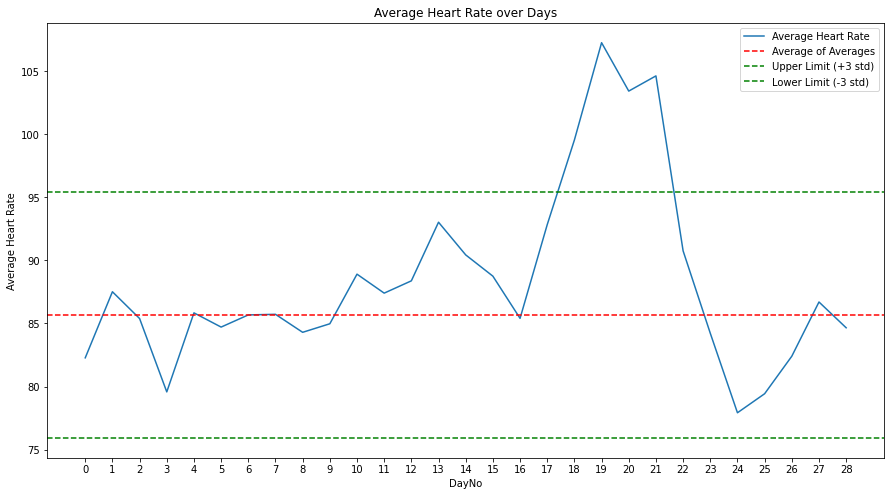

In [49]:
from scipy import stats

temp = df_selected[df_selected["SubjectNr"] == 3004792]

columns_to_average = ['HR{:02d}'.format(i) for i in range(24)]
columns_to_average = [col for col in columns_to_average if col in df_selected.columns]


hallo = temp[columns_to_average]
z_scores = np.abs(stats.zscore(hallo))
threshold = 2
outlier_mask = (z_scores > threshold).any(axis=1)
temp_without_outliers = hallo[~outlier_mask]

# Calculate the average for each row
averages = temp[columns_to_average].mean(axis=1).tolist() 
averages_24 = temp_without_outliers[columns_to_average].mean(axis=1).tolist()

std_of_averages = np.std(averages_24)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8)) 

average_of_averages = sum(averages_24) / len(averages_24)

# Calculate the upper and lower limits (+- 3 standard deviations)
upper_limit = average_of_averages + 3 * std_of_averages

lower_limit = average_of_averages - 3 * std_of_averages

# Plot the data
plt.plot(temp['DayNo'], averages, label='Average Heart Rate')
plt.xticks(temp['DayNo'])
plt.axhline(y=average_of_averages, color='r', linestyle='--', label='Average of Averages')
plt.axhline(y=upper_limit, color='g', linestyle='--', label='Upper Limit (+3 std)')
plt.axhline(y=lower_limit, color='g', linestyle='--', label='Lower Limit (-3 std)')


# Set labels and title
plt.xlabel('DayNo')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate over Days')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [812]:
# ## PLOT
# fig, ax = plt.subplots(figsize = (20, 12))

# col = "stepsTotalDaily"
# one_child = df[df["SubjectNr"] == 8380204] # weekday_Tue

# a = one_child.loc[one_child['anomaly2'] == -1, 
#            ['DayNo', col]]

# ax.plot(one_child['DayNo'], one_child[col], 
#         color = 'lightgreen', 
#         label = 'Normal')

# ax.scatter(a['DayNo'], a[col], 
#            color = 'red', 
#            label = 'Anomaly')

# plt.legend()
# plt.show();